# Time series forcasting - Rose

1.Read the data as an appropriate Time Series data and plot the data.

In [1]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Importing Libraries
import numpy as np # Numerical libraries
import pandas as pd # to handle data in form of rows and columns

# For Visualisation-import ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns
# The following code is to set the subsequent figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

# To calculate accuracy measures
from sklearn import metrics
#highlights
import matplotlib.dates as mdates

Loading the dataset

In [2]:
#read the rose data
df_rose = pd.read_csv('/content/drive/MyDrive/data/Project 2/Rose.csv')
df_rose.head(10)

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0
5,1980-06,168.0
6,1980-07,118.0
7,1980-08,129.0
8,1980-09,205.0
9,1980-10,147.0


In [3]:
df_rose.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


Create time stamps 

In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date


DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding the time stamp to the data frame
df_rose['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_rose.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [6]:
# Set Time_Stamp as an index
df_rose.set_index('Time_Stamp',inplace=True)
df_rose.drop(['YearMonth'], axis=1, inplace=True)
df_rose.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Checking null values

In [7]:
#if any null value in present
df_rose.isnull().any()

Rose    True
dtype: bool

In [8]:
df_rose.isnull()[-13:-11]

,Rose
Time_Stamp,
1994-07-31,True
1994-08-31,True


In [9]:
df_rose[-13:-11]

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


In [10]:
#how many null values are present in that dataset
df_rose.isnull().sum()

Rose    2
dtype: int64

**Sales Data of Rose Wines:**

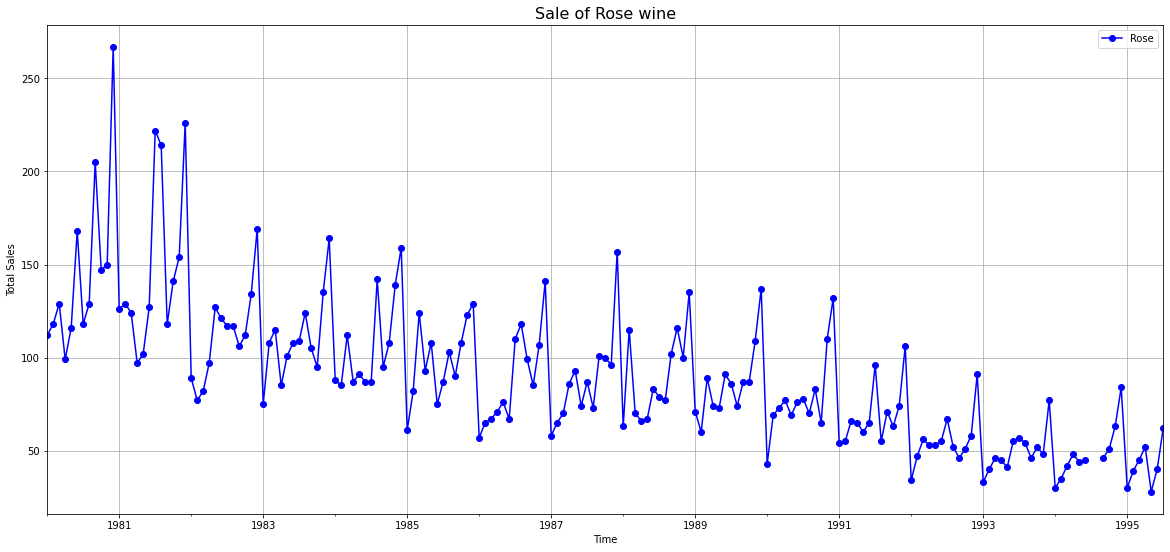

In [11]:
printmd('**Sales Data of Rose Wines:**')
df_rose.plot(marker = "o",figsize=(20, 9),color='blue')
plt.title('Sale of Rose wine', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.grid();
plt.axvspan(*mdates.datestr2num(["1994-07-31","1994-08-31"]), color='red', alpha=0.5)
plt.show()

Imputing the missing values

1. Using mean

                 Rose
Time_Stamp           
1994-07-31  90.394595
1994-08-31  90.394595


**Sales Data of Rose Wines:**

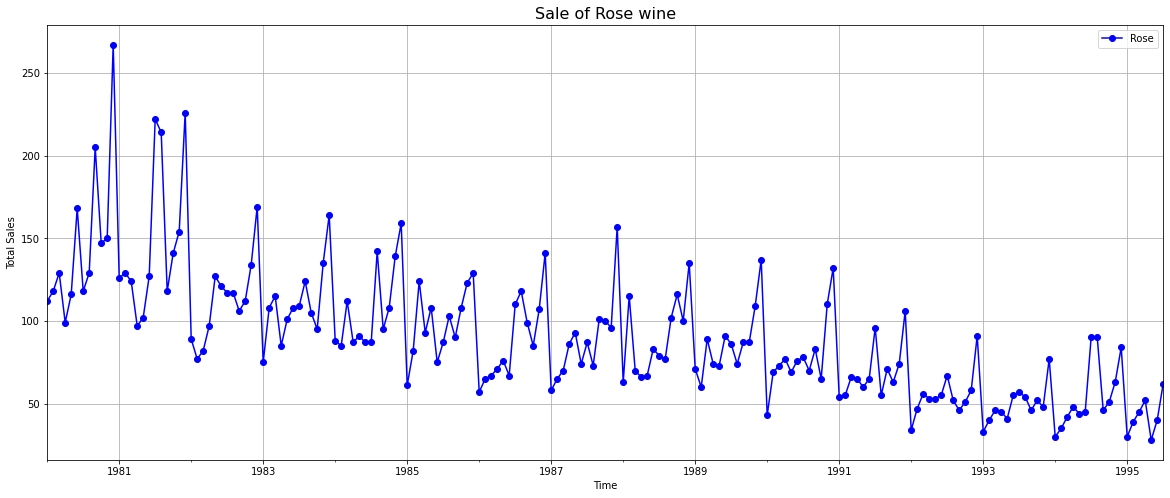

In [12]:
#mean
fill_mean=df_rose.fillna(df_rose.mean())
print(fill_mean[-13:-11])
printmd('**Sales Data of Rose Wines:**')
fill_mean.plot(marker = "o",figsize=(20, 8),color='blue')
plt.title('Sale of Rose wine', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.grid();
plt.axvspan(*mdates.datestr2num(["1994-07-31","1994-08-31"]), color='pink', alpha=0.5)
plt.show()

2.Using median

            Rose
Time_Stamp      
1994-07-31  86.0
1994-08-31  86.0


**Sales Data of Rose Wines:**

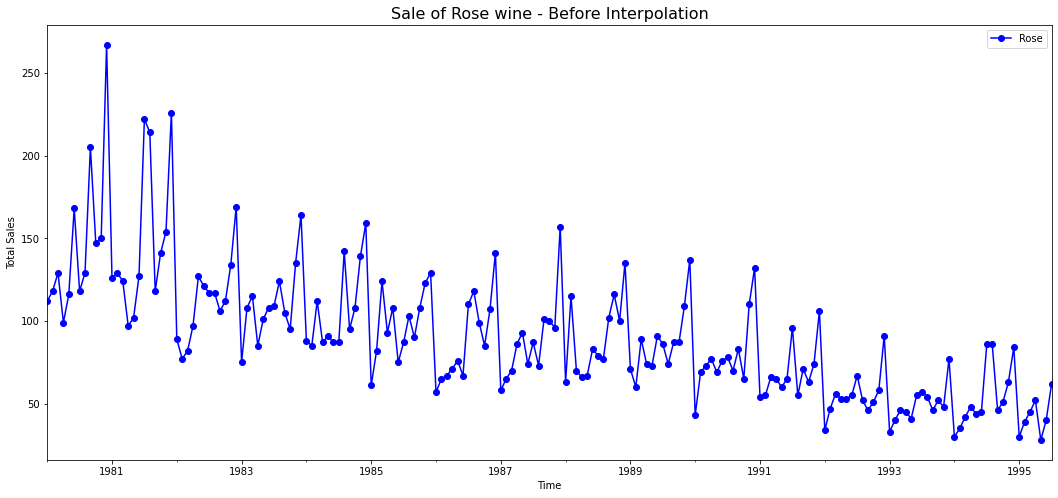

In [13]:
#median
fill_median=df_rose.fillna(df_rose.median())
print(fill_median[-13:-11])
printmd('**Sales Data of Rose Wines:**')
fill_median.plot(marker = "o",figsize=(18, 8),color='blue')
plt.title('Sale of Rose wine - Before Interpolation', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.axvspan(*mdates.datestr2num(["1994-07-31","1994-08-31"]), color='red', alpha=0.5)
plt.show()

In [14]:
fill_median[-13:-11]

,Rose
Time_Stamp,
1994-07-31,86.0
1994-08-31,86.0


In [15]:
fill_mean[-13:-11]

,Rose
Time_Stamp,
1994-07-31,90.394595
1994-08-31,90.394595


3. Using mode

Time_Stamp
1994-07-31    87.0
1994-08-31    87.0
Name: Rose, dtype: float64


**Sales Data of Rose Wines:**

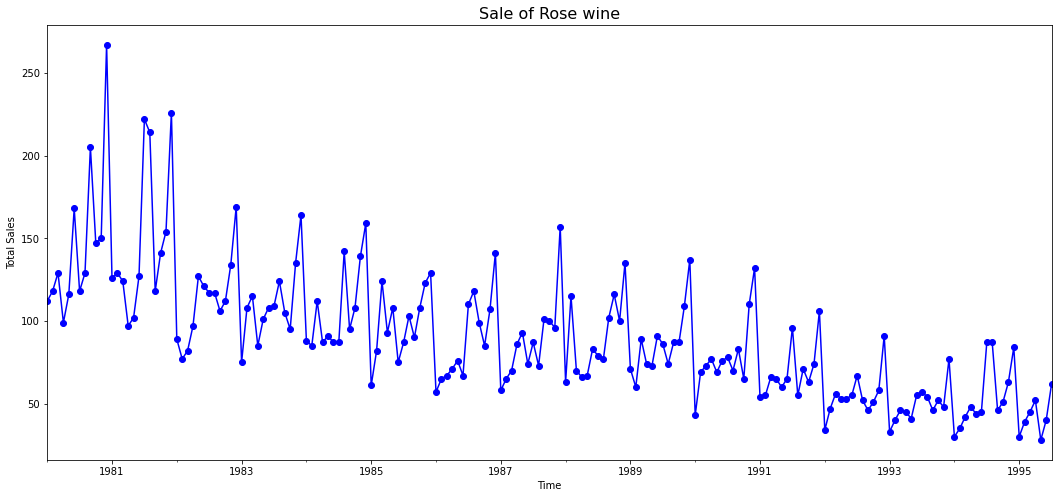

In [16]:
#mode
fill_mode=df_rose['Rose'].fillna(df_rose['Rose'].mode()[0])
print(fill_mode[-13:-11])
printmd('**Sales Data of Rose Wines:**')
fill_mode.plot(marker = "o",figsize=(18, 8),color='blue')
plt.title('Sale of Rose wine', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.axvspan(*mdates.datestr2num(["1994-07-31","1994-08-31"]), color='red', alpha=0.5)
plt.show()

4.Using linear Imputation

In [17]:
#linear imputation
linear= df_rose['Rose'].interpolate(method='linear')
print(linear[-13:-11])

Time_Stamp
1994-07-31    45.333333
1994-08-31    45.666667
Name: Rose, dtype: float64


Time_Stamp
1994-07-31    45.333333
1994-08-31    45.666667
Name: Rose, dtype: float64


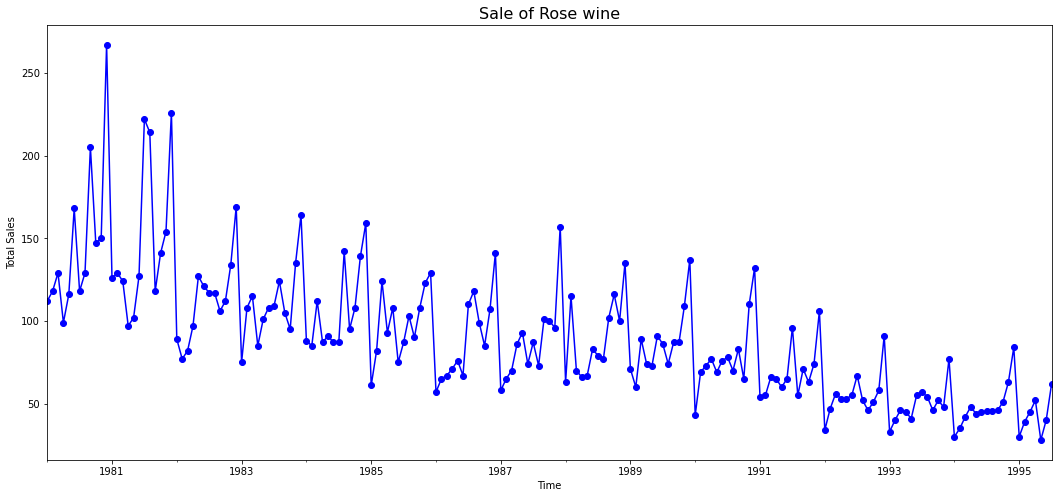

In [18]:
#linear imputation
linear= df_rose['Rose'].interpolate(method='linear')
print(linear[-13:-11])
linear.plot(marker = "o",figsize=(18, 8),color='blue')
plt.title('Sale of Rose wine', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.axvspan(*mdates.datestr2num(["1994-07-31","1994-08-31"]), color='red', alpha=0.5)
plt.show()


5. Using Spline imputation

In [19]:
#spline imputation
spline= df_rose['Rose'].interpolate(option='spline')
spline[-13:-11]

Time_Stamp
1994-07-31    45.333333
1994-08-31    45.666667
Name: Rose, dtype: float64

Time_Stamp
1994-07-31    45.333333
1994-08-31    45.666667
Name: Rose, dtype: float64


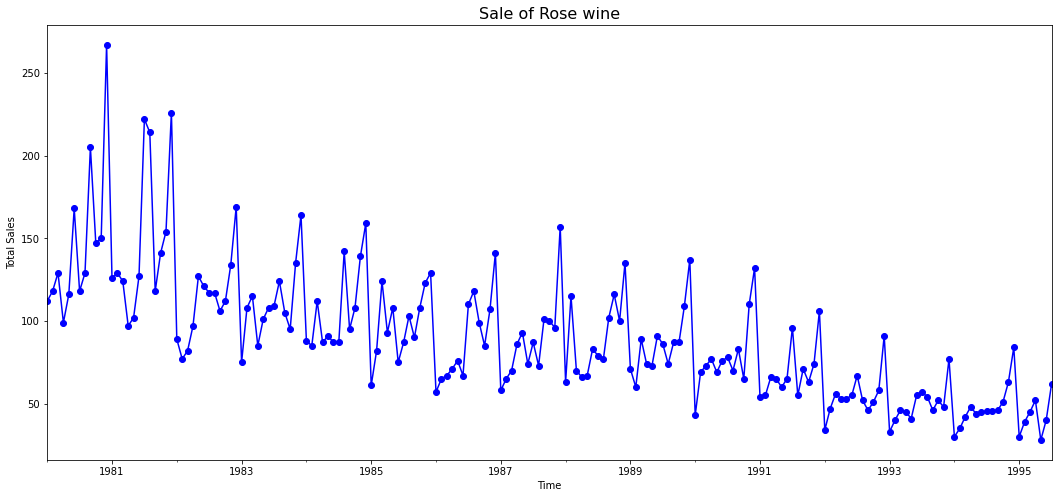

In [20]:
#spline imputation
spline= df_rose['Rose'].interpolate(option='spline')
print(spline[-13:-11])
spline.plot(marker = "o",figsize=(18, 8),color='blue')
plt.title('Sale of Rose wine', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.axvspan(*mdates.datestr2num(["1994-07-31","1994-08-31"]), color='red', alpha=0.5)
plt.show()

In [21]:
df_rose[-13:-11]

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


6. Using Polynomial imputation

In [22]:
polynomial= df_rose['Rose'].interpolate(method = "polynomial", order=2)
polynomial[-13:-11]

Time_Stamp
1994-07-31    45.406283
1994-08-31    44.419745
Name: Rose, dtype: float64

Time_Stamp
1994-07-31    45.406283
1994-08-31    44.419745
Name: Rose, dtype: float64


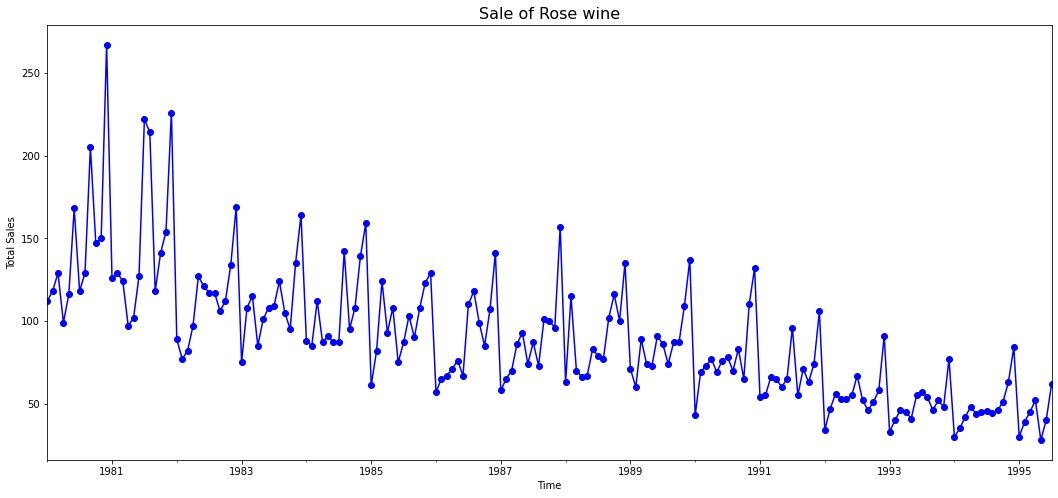

In [23]:
#polynomial imputation
polynomial.plot(marker = "o",figsize=(18, 8),color='blue')
print(polynomial[-13:-11])
plt.title('Sale of Rose wine', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.axvspan(*mdates.datestr2num(["1994-07-31","1994-08-31"]), color='red', alpha=0.5)
plt.show()

7. Using paddling imputation

In [24]:
#paddling
df_rose=df_rose.interpolate(method="pad",limit=2)
df_rose[-13:-11]

,Rose
Time_Stamp,
1994-07-31,45.0
1994-08-31,45.0


            Rose
Time_Stamp      
1994-07-31  45.0
1994-08-31  45.0


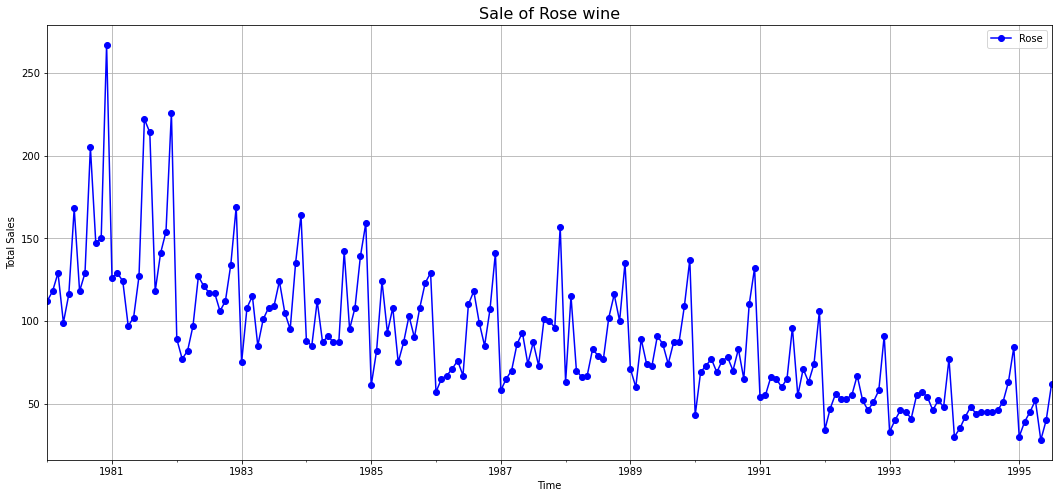

In [25]:
#paddling imputation
print(df_rose[-13:-11])
df_rose.plot(marker="o", figsize=(18, 8),color='blue')
plt.title('Sale of Rose wine', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.axvspan(*mdates.datestr2num(["1994-07-31","1994-08-31"]), color='red', alpha=0.5)
plt.grid()
plt.show()

I am going with paddling methods because sales never be in decimals and this methods shows sales upto the mark

# Exploratory Data Analysis

2.	Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [26]:
printmd('**Data Description for Rose Dataset:**')
df_rose.describe()

**Data Description for Rose Dataset:**

,Rose
count,187.000000
mean,89.909091
std,39.244440
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


•	The descriptive summary of the data shows that on an average 90 units of Rose wines were sold each month on the given period of time.
•	The least sales of Rose wine was 28 units and highest sales was 267 units.
•	The basic measures of descriptive statistics tell us how the sales have varied across the years.


In [27]:
rose = pd.read_csv('/content/drive/MyDrive/data/Project 2/Rose.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

Boxplot to understand spread of sales or any outliers present in datasets

**Yearly Boxplot for Rose Dataset:**

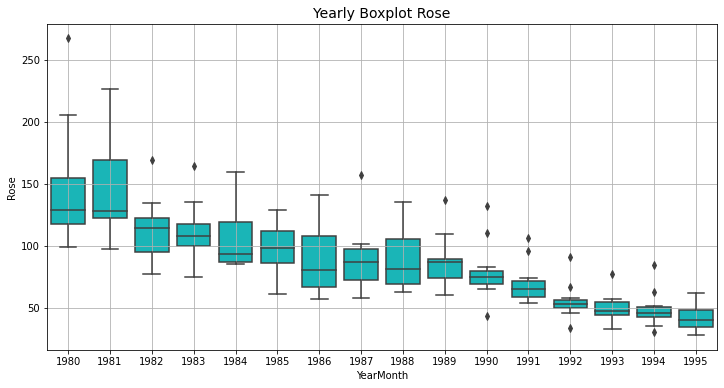

In [28]:
#yearly boxplot
printmd('**Yearly Boxplot for Rose Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = rose.index.year,y = rose, color = 'darkturquoise')
plt.title('Yearly Boxplot Rose', fontsize=14)
plt.grid()
plt.show()

**Monthly Boxplot for all the years for Rose Dataset:**

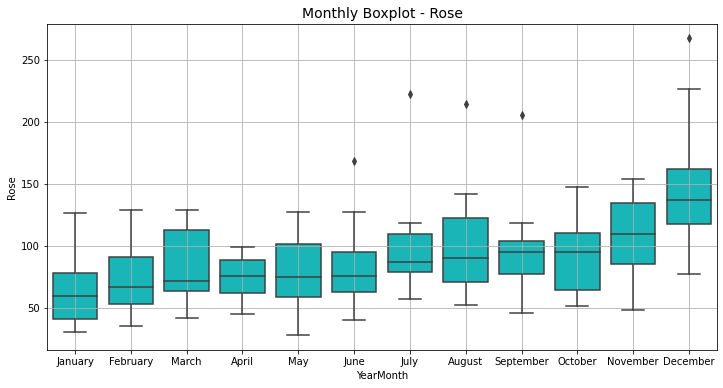

In [29]:
#monthly boxplot
printmd('**Monthly Boxplot for all the years for Rose Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = rose.index.month_name(),y = rose, color='darkturquoise')
plt.title('Monthly Boxplot - Rose', fontsize=14)
plt.grid()
plt.show()

•	The yearly boxplot shows that the Average sales of Rose wine goes downward trends year by year. The outliers present in the upper section of plot shows that this was the seasonal sales during the seasonal months.
•	The monthly plot shows that the November and December months contains highest number of sales which is around 140 units and 110 units respectively.

Plotting time series monthplots to understand the spread of sales across different years within diffrent months across year

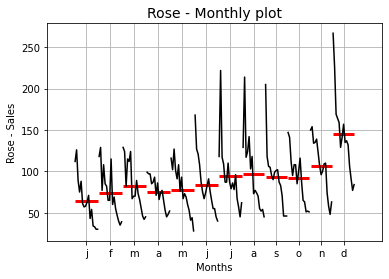

In [30]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df_rose,ylabel='Rose - Sales')
plt.xlabel('Months')
plt.title('Rose - Monthly plot', fontsize = 14)
plt.grid()
plt.show()


•	The monthly plot for Rose shows mean and variation of units sold each month over the years.
•	Sales in months of July, August, September and December shows a higher variation then remaining months.
•	The sales of December month have highest variation from 75 to 250 units.


Plot graph of monthly rose wine sales across year

In [31]:
monthly_sales_across_years_rose = pd.pivot_table(pd.DataFrame(df_rose), columns = df_rose.index.month, 
                                                      index = df_rose.index.year)
monthly_sales_across_years_rose

Rose                             ...                                   
Time_Stamp     1      2      3     4      5   ...     8      9      10     11     12
Time_Stamp                                    ...                                   
1980        112.0  118.0  129.0  99.0  116.0  ...  129.0  205.0  147.0  150.0  267.0
1981        126.0  129.0  124.0  97.0  102.0  ...  214.0  118.0  141.0  154.0  226.0
1982         89.0   77.0   82.0  97.0  127.0  ...  117.0  106.0  112.0  134.0  169.0
1983         75.0  108.0  115.0  85.0  101.0  ...  124.0  105.0   95.0  135.0  164.0
1984         88.0   85.0  112.0  87.0   91.0  ...  142.0   95.0  108.0  139.0  159.0
1985         61.0   82.0  124.0  93.0  108.0  ...  103.0   90.0  108.0  123.0  129.0
1986         57.0   65.0   67.0  71.0   76.0  ...  118.0   99.0   85.0  107.0  141.0
1987         58.0   65.0   70.0  86.0   93.0  ...   73.0  101.0  100.0   96.0  157.0
1988         63.0  115.0   70.0  66.0   67.0  ...   77.0  102.0  116.0  100.0  135.0
1989         71.0   60.0   89.0  74.0   73.0  ...   74.0   87.0   87.0  109.0  137.0
1990         43.0   69.0   73.0  77.0   69.0  ...   70.0   83.0   65.0  110.0  132.0
1991         54.0   55.0   66.0  65.0   60.0  ...   55.0   71.0   63.0   74.0  106.0
1992         34.0   47.0   56.0  53.0   53.0  ...   52.0   46.0   51.0   58.0   91.0
1993         33.0   40.0   46.0  45.0   41.0  ...   54.0   46.0   52.0   48.0   77.0
1994         30.0   35.0   42.0  48.0   44.0  ...   45.0   46.0   51.0   63.0   84.0
1995         30.0   39.0   45.0  52.0   28.0  ...    NaN    NaN    NaN    NaN    NaN

[16 rows x 12 columns]

**Monthly Wine sales across years for Rose:**

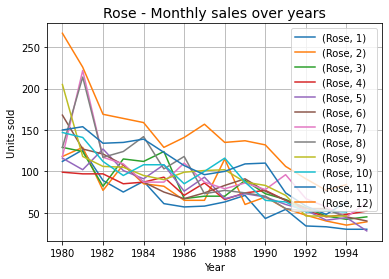

In [32]:
printmd('**Monthly Wine sales across years for Rose:**')
monthly_sales_across_years_rose.plot()
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Rose - Monthly sales over years', fontsize=14)
plt.grid()
plt.show()

•	Plot of the monthly sales also shows the seasonality component of the time series.
•	November and December selling exponentially higher volumes than other months.
•	The highest volume of Rose wines were sold in month of December in the year of 1980 which is 267. And lowest Rose wines were sold in the month of May in the year of 1995 which is 28.

# Decomposition 

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose



*   Multiplicative Seasonality



**Decomposition of Rose Time Series with multiplicative Seasonality:**

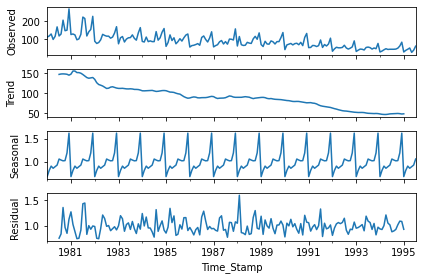

In [34]:
printmd('**Decomposition of Rose Time Series with multiplicative Seasonality:**')
decomposition_mul = seasonal_decompose(df_rose,model='multiplicative')
decomposition_mul.plot();



*   Additive seasonality




**Decomposition of Rose Time Series with additive Seasonality:**

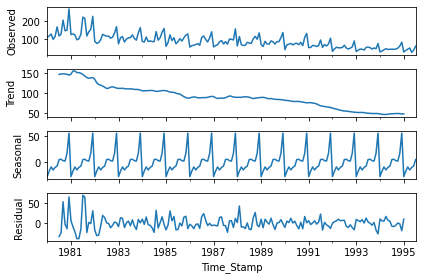

In [35]:
printmd('**Decomposition of Rose Time Series with additive Seasonality:**')
decomposition_mul = seasonal_decompose(df_rose,model='additive')
decomposition_mul.plot();

shows visible annual seasonality and a downward trend

early period of the plot shows higher variation 
The residuals shows a pattern of high variability 

# Check the Stationarity of data

5.	Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

In [36]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

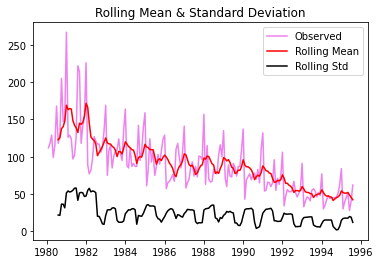

Results of Dickey-Fuller Test:
Test Statistic                  -1.874856
p-value                          0.343981
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [37]:
#Original Time Series
test_stationarity(df_rose['Rose'], 'violet')

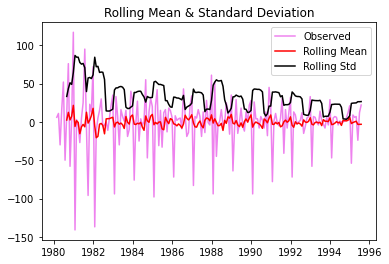

Results of Dickey-Fuller Test:
Test Statistic                -8.044139e+00
p-value                        1.813580e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [38]:
test_stationarity(df_rose['Rose'].diff().dropna(), 'violet')

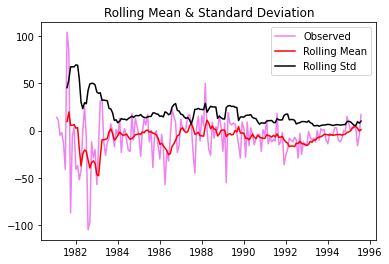

Results of Dickey-Fuller Test:
Test Statistic                  -4.254929
p-value                          0.000531
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [39]:
#check Seasonality Time Series: 
test_stationarity(df_rose['Rose'].diff(12).dropna(), 'violet')

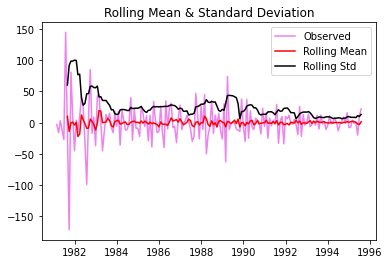

Results of Dickey-Fuller Test:
Test Statistic                  -4.605046
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [40]:
test_stationarity((df_rose['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

Find Autocorrelation and partial Autocorrelation

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

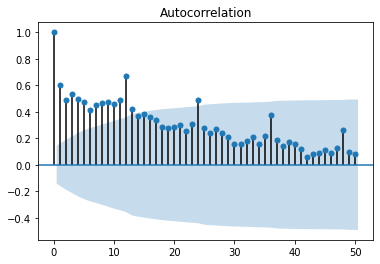

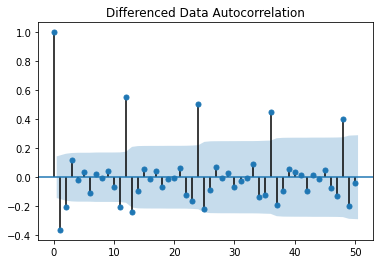

In [42]:
#ACF plot
plot_acf(df_rose['Rose'],lags=50)
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

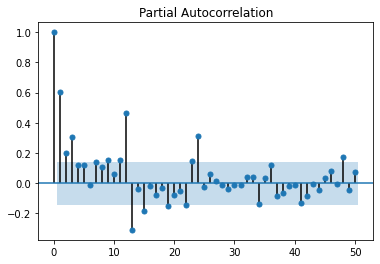

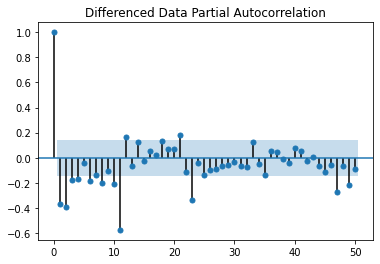

In [43]:
#PACF plot
plot_pacf(df_rose['Rose'],lags=50)
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

# Split the data

3.	Split the data into training and test. The test data should start in 1991.

In [44]:
df_rose = pd.DataFrame(df_rose)
train_rose = df_rose[df_rose.index.year < 1991]
test_rose = df_rose[df_rose.index.year >= 1991]
print('Length of Train Data:', len(train_rose))
print('Length of Test Data:', len(test_rose))
#train_rose
#test_rose

Length of Train Data: 132
Length of Test Data: 55


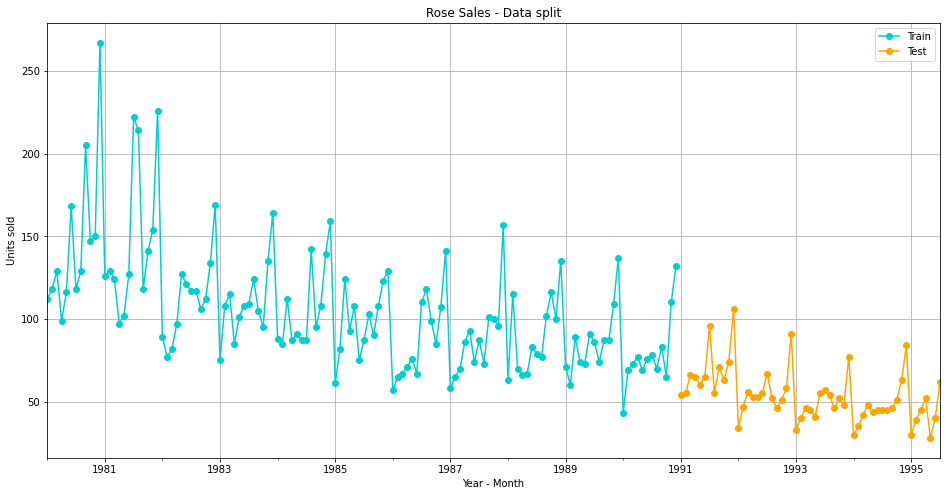

In [45]:
plt.figure(figsize = (16,8))
train_rose['Rose'].plot(label = 'Train',color='darkturquoise',marker="o")
test_rose['Rose'].plot(label = 'Test',color='orange',marker="o")
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.grid()
plt.show;

Here I Split the data into training and test. The test data starting from the year 1991.
There are total 187 values present in rose dataset after spliting the dataset there are total 132 values in the train set and 55 values in the test set.
In the above plot darkturquoise color points showing train datasets and orange color represents test dataset.

### Building Various Exponential smoothing models 

4.	Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

In [46]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Simple exponential smoothing

In [47]:
SES_train = train_rose.copy()
SES_test = test_rose.copy()

model_SES = SimpleExpSmoothing(SES_train['Rose'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_rose))
SES_test.head()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.105003
1991-02-28,55.0,87.105003
1991-03-31,66.0,87.105003
1991-04-30,65.0,87.105003
1991-05-31,60.0,87.105003


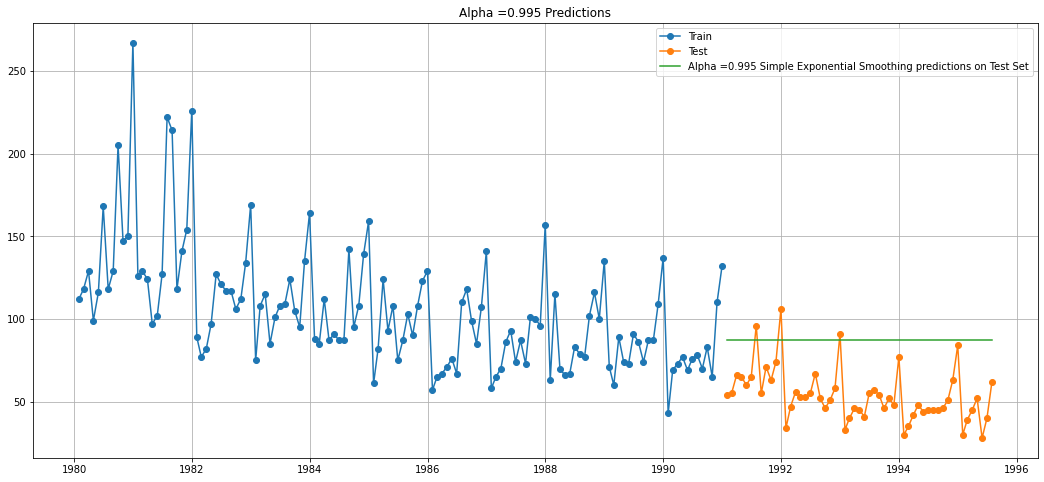

In [48]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,8))
plt.plot(SES_train['Rose'], label='Train',marker="o")
plt.plot(SES_test['Rose'], label='Test',marker="o")

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [49]:
#model evalution
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
rose_resultsa = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,Simple Exponential Smoothing'])
rose_resultsa

,Test RMSE
"Alpha=0.995,Simple Exponential Smoothing",36.816908


In [50]:
import pandas as pd
results=pd.concat([rose_resultsa])
results

,Test RMSE
"Alpha=0.995,Simple Exponential Smoothing",36.816908


# Double Exponential smoothing 

In [51]:
DES_train = train_rose.copy()
DES_test = test_rose.copy()

model_DES = Holt(DES_train['Rose'])

## First we will define an empty dataframe to store our values from the loop
resultsde = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsde

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [52]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsde = resultsde.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsde

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,265.591922
1,0.3,0.4,37.393239,358.775361
2,0.3,0.5,38.888325,451.834692
3,0.3,0.6,40.280670,536.978631
4,0.3,0.7,41.403518,601.640840
...,...,...,...,...
59,1.0,0.6,51.831610,801.704637
60,1.0,0.7,54.497039,841.917005
61,1.0,0.8,57.365879,853.989973
62,1.0,0.9,60.474309,834.735365


In [53]:
#sort the data frame in the ascending ordering of the 'Test RMSE' values.
resultsde.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,265.591922
8,0.4,0.3,36.749123,339.330850
1,0.3,0.4,37.393239,358.775361
16,0.5,0.3,37.433314,394.296935
24,0.6,0.3,38.348984,439.320331


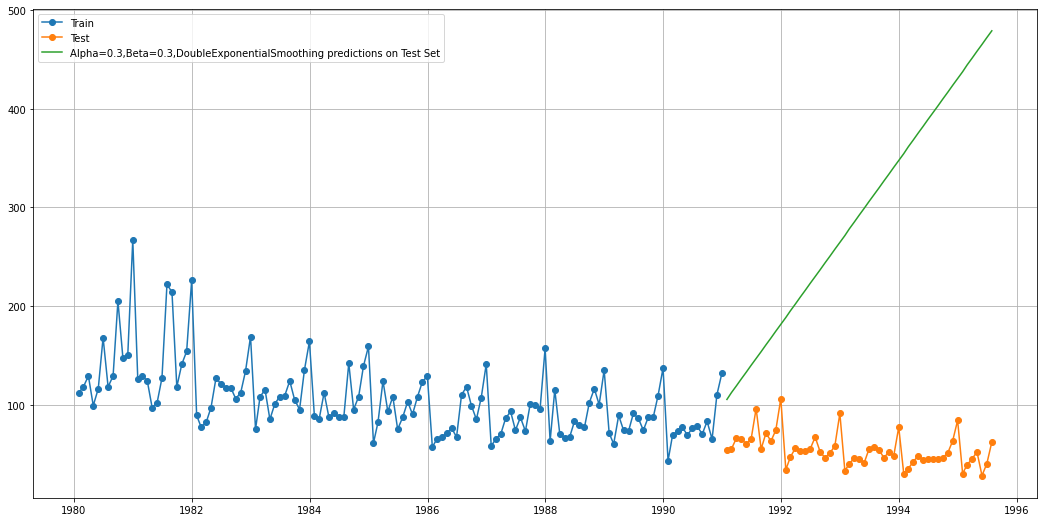

In [54]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train',marker="o")
plt.plot(DES_test['Rose'], label='Test',marker="o")
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [55]:
resultsdes = pd.DataFrame({'Test RMSE': [resultsde.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])
resultsdes

,Test RMSE
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922


In [56]:
rose_resultses = pd.concat([results, resultsdes])
rose_resultses

,Test RMSE
"Alpha=0.995,Simple Exponential Smoothing",36.816908
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922


# Triple Exponential Smoothing

In [57]:
TES_train = train_rose.copy()
TES_test = test_rose.copy()

model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

model_TES_autofit = model_TES.fit()

model_TES_autofit.params

## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_rose))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.674338
1991-02-28,55.0,63.471271
1991-03-31,66.0,68.788789
1991-04-30,65.0,60.277826
1991-05-31,60.0,67.180381


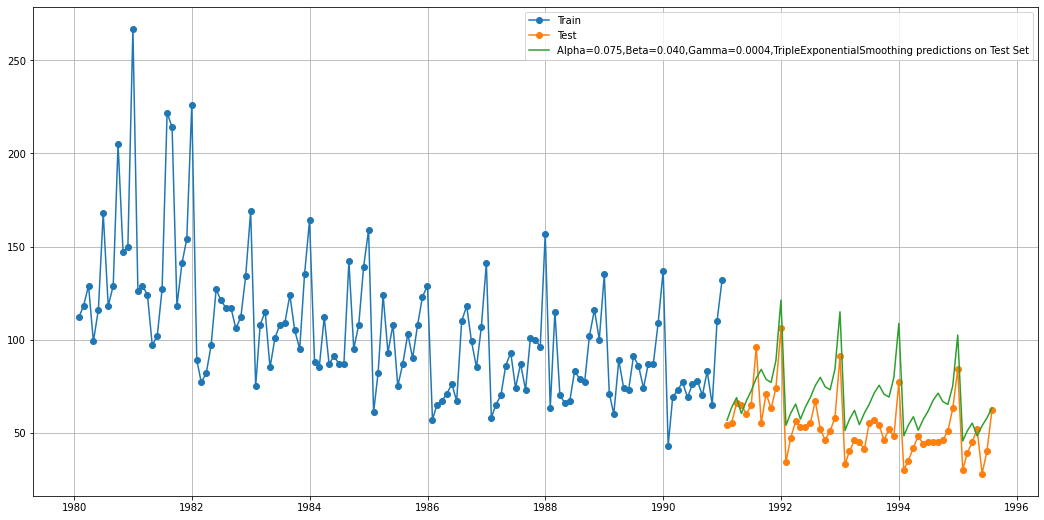

In [58]:
## Plotting on both the Training and Test using autofit
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train',marker="o")
plt.plot(TES_test['Rose'], label='Test',marker="o")
plt.plot(TES_test['auto_predict'], label='Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [59]:
## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
resultste = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing'])
resultste

,Test RMSE
"Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing",17.395241


In [60]:
## First we will define an empty dataframe to store our values from the loop
resultstes = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultstes

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [61]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultstes = resultstes.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)
            
resultstes

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,27.217969,19.074245
1,0.3,0.3,0.4,27.399095,11.185630
2,0.3,0.3,0.5,27.928512,30.542692
3,0.3,0.3,0.6,28.888611,63.601214
4,0.3,0.3,0.7,30.568635,122.452533
...,...,...,...,...,...
507,1.0,1.0,0.6,28358.458519,9603.639171
508,1.0,1.0,0.7,30724.126331,23029.955433
509,1.0,1.0,0.8,1218.755446,9626.707516
510,1.0,1.0,0.9,14150.253251,9691.904819


In [62]:
resultstess = pd.DataFrame({'Test RMSE': [resultstes.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])
resultstess

,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",10.951007


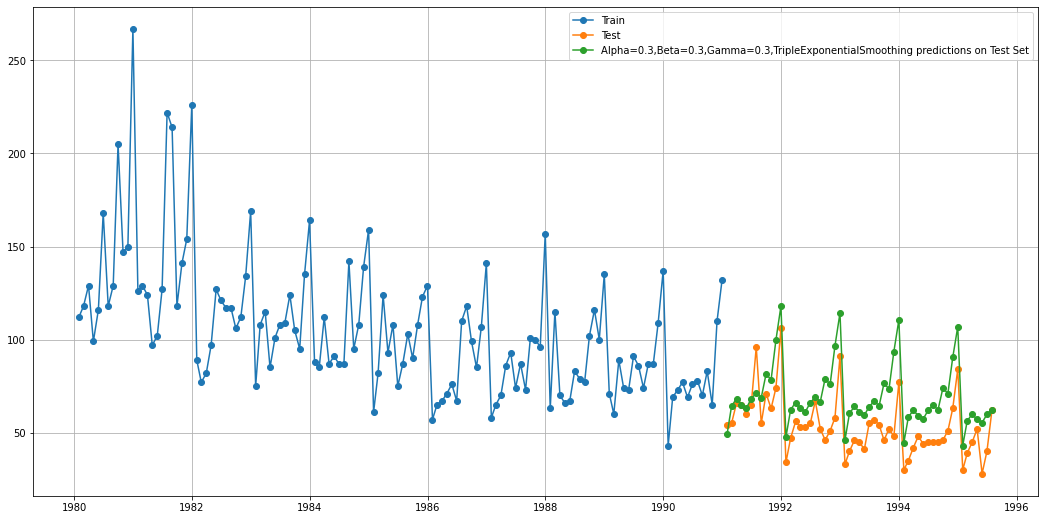

In [63]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train',marker="o")
plt.plot(TES_test['Rose'], label='Test',marker="o")
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set',marker="o")
plt.legend(loc='best')
plt.grid();

In [64]:
final_resultstes=pd.concat([resultste,resultstess])
final_resultstes

,Test RMSE
"Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing",17.395241
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",10.951007


In [65]:
rose_final_result_es=pd.concat([rose_resultses,final_resultstes])
rose_final_result_es

,Test RMSE
"Alpha=0.995,Simple Exponential Smoothing",36.816908
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922
"Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing",17.395241
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",10.951007


# Linear Regression

In [66]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+133 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

LinearRegression_train_rose['time'] = train_time
LinearRegression_test_rose['time'] = test_time


Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


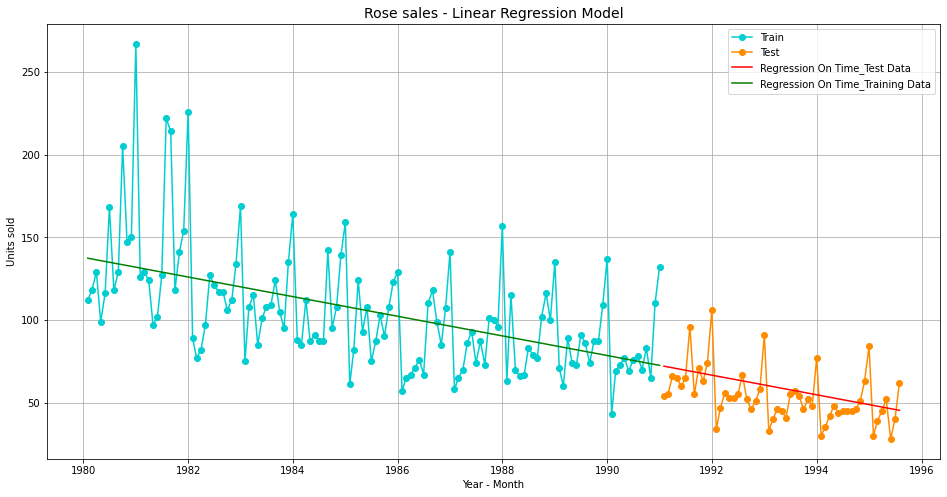

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train_rose[['time']],LinearRegression_train_rose['Rose'].values)
LinearRegression_train_rose['RegOnTime_rose'] = lr.predict(LinearRegression_train_rose[['time']])
LinearRegression_test_rose['RegOnTime_rose'] = lr.predict(LinearRegression_test_rose[['time']])

plt.figure(figsize=(16,8))
plt.plot( train_rose['Rose'], label='Train',color = 'darkturquoise',marker="o")
plt.plot(test_rose['Rose'], label='Test',color = 'darkorange',marker="o")
plt.plot(LinearRegression_test_rose['RegOnTime_rose'], label='Regression On Time_Test Data',color = 'red')
plt.plot(LinearRegression_train_rose['RegOnTime_rose'], label='Regression On Time_Training Data',color = 'green')
plt.title('Rose sales - Linear Regression Model', fontsize = 14)
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.grid()

In [68]:
#model evalution
rmse_reg = np.sqrt(metrics.mean_squared_error(test_rose['Rose'],LinearRegression_test_rose['RegOnTime_rose']))
print("For Regression On Time forecast on the Test Data, RMSE is %3.3f " %(rmse_reg))


For Regression On Time forecast on the Test Data, RMSE is 15.276 


In [69]:
rose_resultslr = pd.DataFrame({'Test RMSE': [rmse_reg]},index=['Linear Regression'])
rose_resultslr

,Test RMSE
Linear Regression,15.275732


# Moving Average

In [70]:
MovingAverage = df_rose.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


             Rose  Rose_Trailing_2  ...  Rose_Trailing_6  Rose_Trailing_9
Time_Stamp                          ...                                  
1980-01-31  112.0              NaN  ...              NaN              NaN
1980-02-29  118.0            115.0  ...              NaN              NaN
1980-03-31  129.0            123.5  ...              NaN              NaN
1980-04-30   99.0            114.0  ...              NaN              NaN
1980-05-31  116.0            107.5  ...              NaN              NaN

[5 rows x 5 columns]


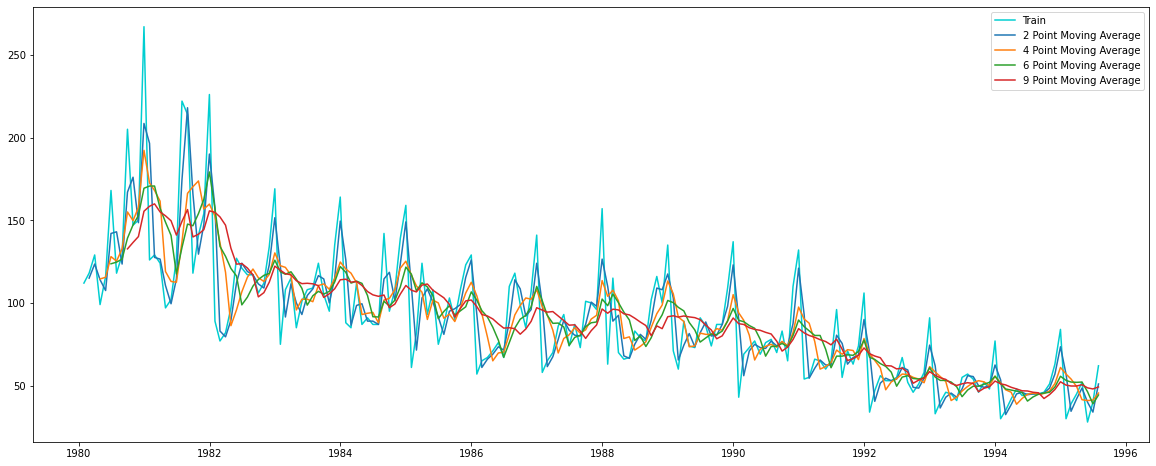

In [71]:
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

print(MovingAverage.head())

#plot
plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Rose'], label='Train', color='darkturquoise')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best');

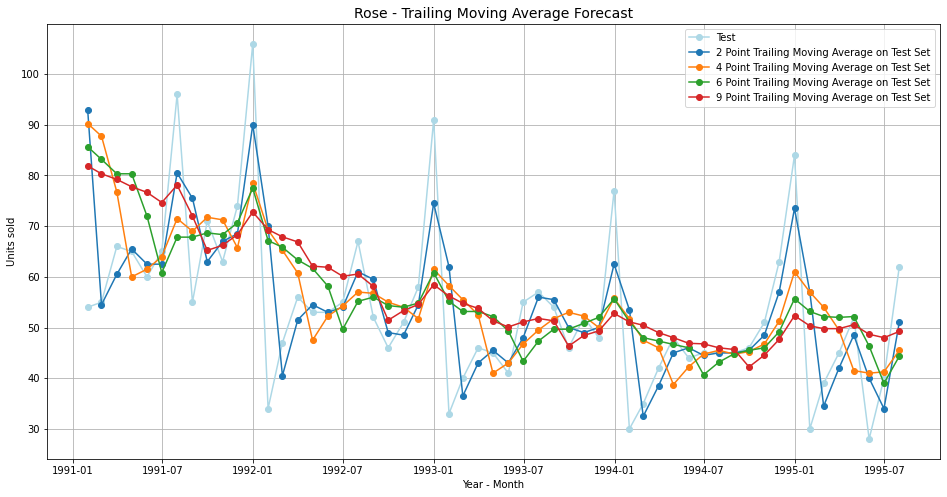

In [72]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

## Plotting on Test data

plt.figure(figsize=(16,8))
# plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'lightblue',marker="o")

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set',marker="o")
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set',marker="o")
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set',marker="o")
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set',marker="o")
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.grid()
plt.title("Rose - Trailing Moving Average Forecast", fontsize=14);

In [73]:
## Test Data - rmse_rose --> 2 point Rose_Trailing MA
rmse_rose_MovingAverage_2 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)

## Test Data - rmse_rose --> 4 point Rose_Trailing MA
rmse_rose_MovingAverage_4 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)

## Test Data - rmse_rose --> 6 point Rose_Trailing MA
rmse_rose_MovingAverage_6 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)

## Test Data - rmse_rose --> 9 point Rose_Trailing MA
rmse_rose_MovingAverage_9 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)

rose_resultsma = pd.DataFrame({'Test RMSE': [rmse_rose_MovingAverage_2,rmse_rose_MovingAverage_4,
                                             rmse_rose_MovingAverage_6,rmse_rose_MovingAverage_9]},
                              index=['For 2 point Moving Average','For 4 point Moving Average',
                                     'For 6 point Moving Average','For 9 point Moving Average'])
rose_resultsma

,Test RMSE
For 2 point Moving Average,11.529409
For 4 point Moving Average,14.455221
For 6 point Moving Average,14.572009
For 9 point Moving Average,14.731209


# Naive Model

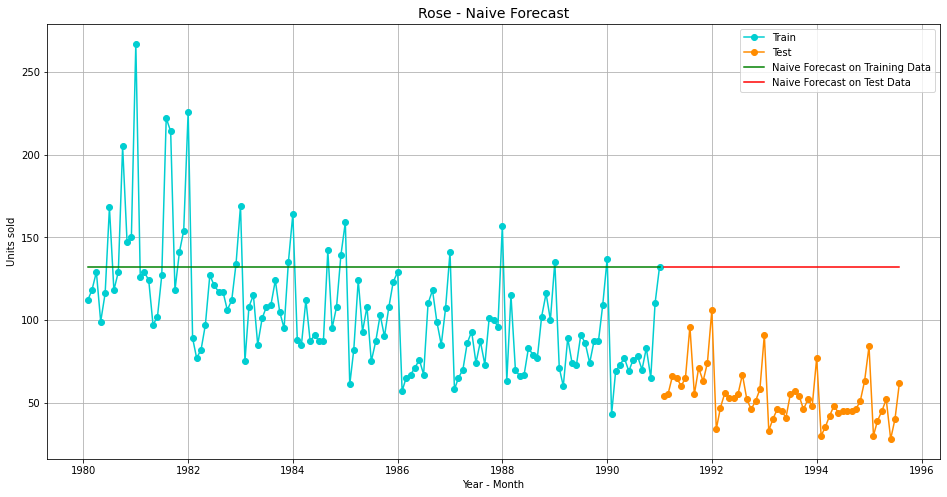

In [74]:
#model building
NaiveModel_train = train_rose.copy()
NaiveModel_test = test_rose.copy()
NaiveModel_test['rose_naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_train['rose_naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]

#plot
plt.figure(figsize=(16,8))
plt.plot(NaiveModel_train['Rose'], label='Train', color = 'darkturquoise',marker="o")
plt.plot(test_rose['Rose'], label='Test', color = 'darkorange',marker="o")
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'green')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14)
plt.grid()
plt.show();

In [75]:
rmse_naive = metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test['rose_naive'],squared=False)
rose_resultsnm = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['Naive Model'])
rose_resultsnm

,Test RMSE
Naive Model,79.73855


# Simple Average

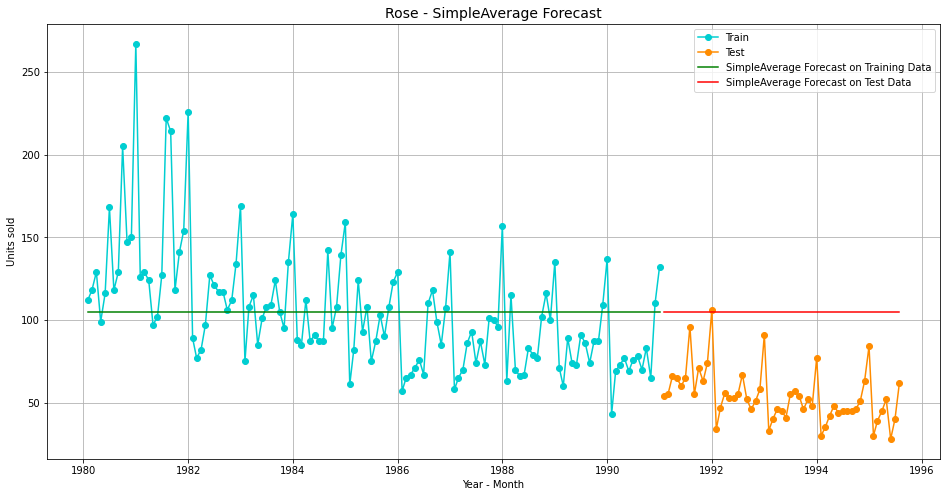

In [76]:
SimpleAverage_train = train_rose.copy()
SimpleAverage_test = test_rose.copy()

SimpleAverage_train['rose_mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'] = train_rose['Rose'].mean()

plt.figure(figsize=(16,8))
plt.plot(SimpleAverage_train['Rose'], label='Train', color = 'darkturquoise',marker="o")
plt.plot(test_rose['Rose'], label='Test', color = 'darkorange',marker="o")
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'green')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - SimpleAverage Forecast", fontsize=14)
plt.grid()
plt.show()

In [77]:
rmse_simple_avg = metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
rose_resultssa = pd.DataFrame({'Test RMSE': [rmse_simple_avg]},index=['SimpleAverage'])
rose_resultssa

,Test RMSE
SimpleAverage,53.480857


In [78]:
rose_results = pd.concat([rose_resultsma, rose_resultslr,rose_resultssa,rose_resultsnm])
rose_results

,Test RMSE
For 2 point Moving Average,11.529409
For 4 point Moving Average,14.455221
For 6 point Moving Average,14.572009
For 9 point Moving Average,14.731209
Linear Regression,15.275732
SimpleAverage,53.480857
Naive Model,79.738550


Comparing various exponential smoothning models

In [79]:
RMSE_values=pd.concat([rose_results,rose_final_result_es])
RMSE_values

,Test RMSE
For 2 point Moving Average,11.529409
For 4 point Moving Average,14.455221
For 6 point Moving Average,14.572009
For 9 point Moving Average,14.731209
Linear Regression,15.275732
SimpleAverage,53.480857
Naive Model,79.738550
"Alpha=0.995,Simple Exponential Smoothing",36.816908
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922
"Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing",17.395241


In [80]:
RMSE_values_sort=pd.concat([rose_results,rose_final_result_es]).sort_values(by=['Test RMSE'])
RMSE_values_sort

,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",10.951007
For 2 point Moving Average,11.529409
For 4 point Moving Average,14.455221
For 6 point Moving Average,14.572009
For 9 point Moving Average,14.731209
Linear Regression,15.275732
"Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing",17.395241
"Alpha=0.995,Simple Exponential Smoothing",36.816908
SimpleAverage,53.480857
Naive Model,79.738550


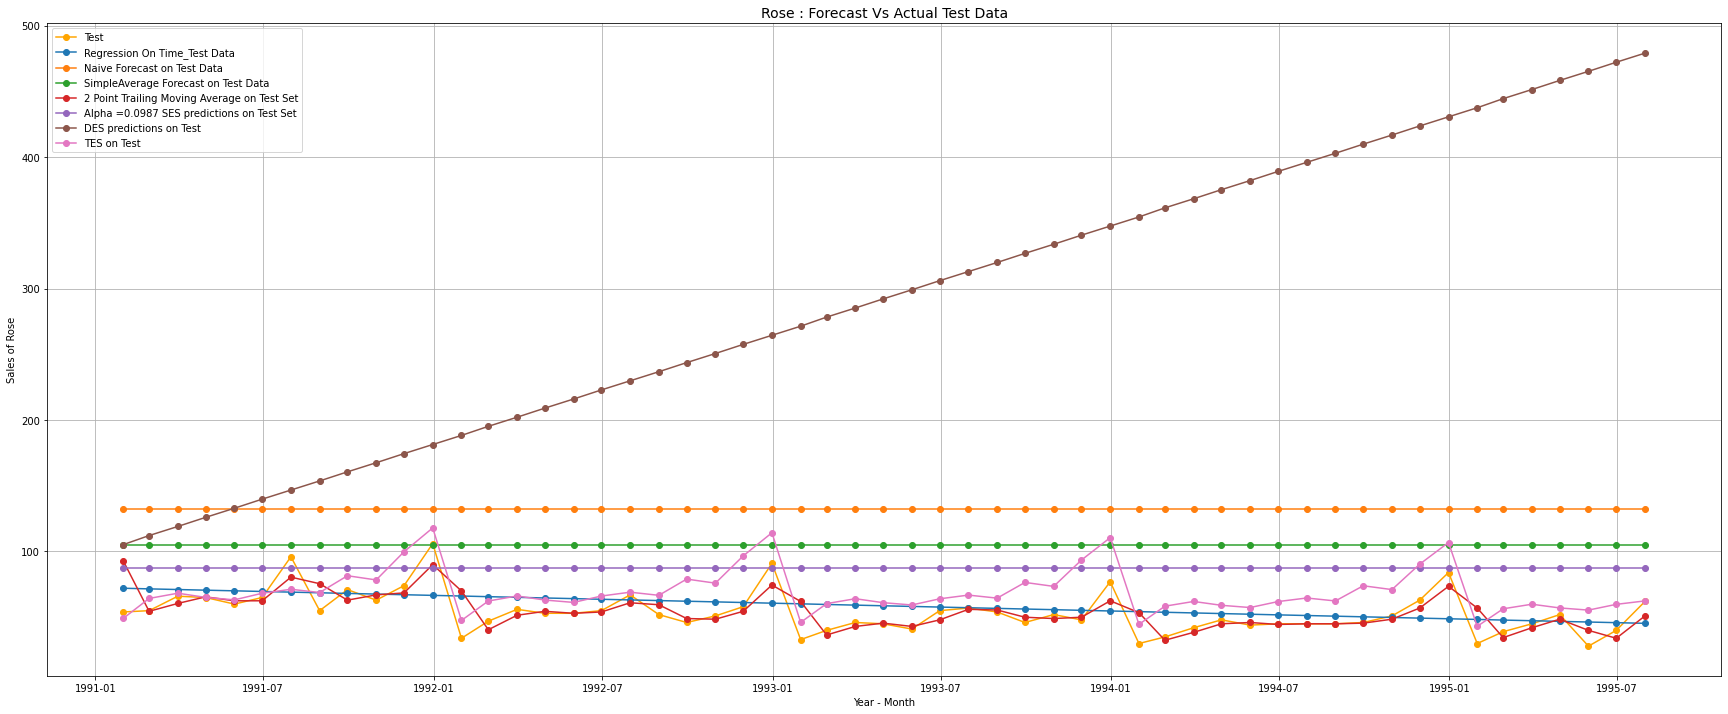

In [81]:
## Plotting on Test data
plt.figure(figsize=(30,12))
#Train data
# plt.plot(train_rose['Rose'], label='Train',color = 'darkturquoise')
#Test data
plt.plot(test_rose['Rose'], label='Test',color = 'orange',marker="o")
#Linear Regression
plt.plot(LinearRegression_test_rose['RegOnTime_rose'], label='Regression On Time_Test Data',marker="o")
#Naive Forecast
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data',marker="o")
#SimpleAverage
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data',marker="o")
#2-point Trailing Moving Average
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set',marker="o")
##SES Optimised at alpha=0.0987
plt.plot(SES_test['predict'], label='Alpha =0.0987 SES predictions on Test Set',marker="o")
#DES iterative at alpha=0.1 and beta=0.1
plt.plot(DES_test['predict', 0.3, 0.3], label='DES predictions on Test',marker="o")
#TES iterative at alpha=0.1, beta=0.2 and gamma=0.3
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='TES on Test',marker="o")

plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')
plt.title('Rose : Forecast Vs Actual Test Data', fontsize=14)
plt.grid()
plt.legend(loc='best');

# Buiding the ARIMA/ SARIMA model

6.	Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Auto ARIMA

In [82]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [83]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [84]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046564
ARIMA(0, 1, 2) - AIC:1276.8353739697154
ARIMA(1, 1, 0) - AIC:1319.3483105801952
ARIMA(1, 1, 1) - AIC:1277.775753537875
ARIMA(1, 1, 2) - AIC:1277.3592251661312
ARIMA(2, 1, 0) - AIC:1300.6092611744334
ARIMA(2, 1, 1) - AIC:1279.0456894093124
ARIMA(2, 1, 2) - AIC:1279.2986939365267


In [85]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835374
5,"(1, 1, 2)",1277.359225
4,"(1, 1, 1)",1277.775754
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [86]:
#(0, 1, 2) AIC=1276.835382
auto_ARIMA = ARIMA(train_rose['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Thu, 03 Mar 2022   AIC                           1276.835
Time:                        04:20:51   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [87]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_rose['Rose']))

In [88]:
rmse_arima_auto_model = metrics.mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA[0],squared=False)
results_auto_ARIMA = pd.DataFrame({'Test RMSE': [rmse_arima_auto_model]}
                           ,index=['Auto_ARIMA(0, 1, 2)'])
results_auto_ARIMA

,Test RMSE
"Auto_ARIMA(0, 1, 2)",15.625163


Auto SARIMA

In [89]:
SARIMA_train = train_rose.copy()
SARIMA_test = test_rose.copy()

In [90]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [91]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

,param,seasonal,AIC


In [92]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301616789
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776228
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.326958965881
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.337538360164
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654736
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374413
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729145873
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244226754
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133560852
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606718045
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:790.9032809266217
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:944.2456655531494
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:929.3362488520064
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:792.7161670359075
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:810.3194350158656
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:804.1555752734207
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:782.1538715128627
SARIMA(0, 

In [93]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 1, 2, 12)",774.969119
53,"(1, 1, 2)","(2, 1, 2, 12)",776.940112
80,"(2, 1, 2)","(2, 1, 2, 12)",776.996099
17,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
79,"(2, 1, 2)","(2, 1, 1, 12)",783.703652


In [94]:
#(0, 1, 2)*(2, 1, 2, 12) AIC=774.969120
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Thu, 03 Mar 2022   AIC                            774.969
Time:                                    04:22:35   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

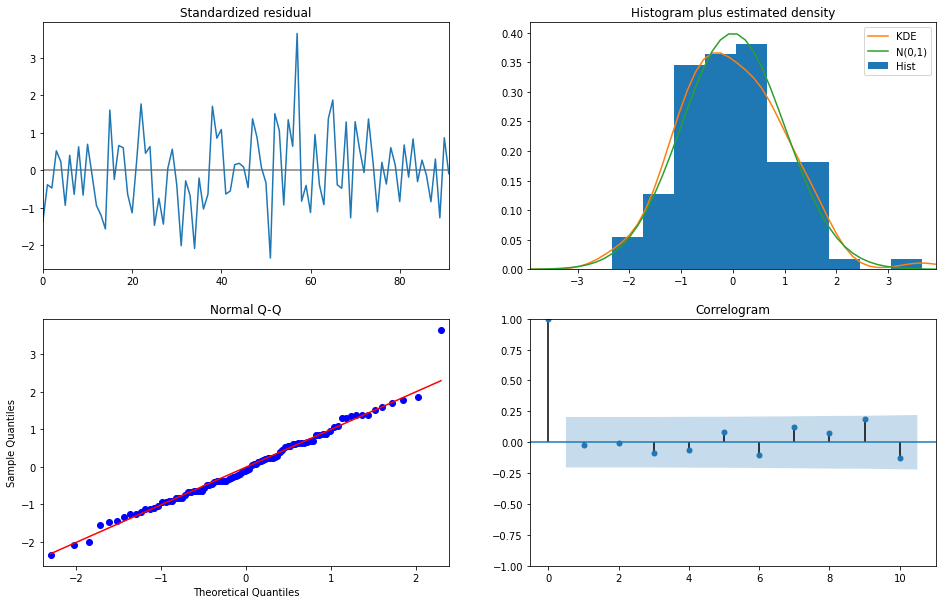

In [95]:
results_auto_SARIMA_rose.plot_diagnostics(figsize=(16, 10))
plt.show()

In [96]:
predicted_auto_SARIMA = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']))
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.213781,14.221640,16.339878,72.087684
1,62.326882,14.300400,34.298614,90.355151
2,67.313430,14.302302,39.281434,95.345426
3,63.161181,14.305204,35.123497,91.198865
4,66.474203,14.310574,38.425993,94.522413


In [97]:
# Extract the predicted and true values of our time series
rose_forecasted = predicted_auto_SARIMA.predicted_mean
SARIMA_test['rose_forecasted'] = predicted_auto_SARIMA.predicted_mean
SARIMA_test.head()

,Rose,rose_forecasted
Time_Stamp,,
1991-01-31,54.0,44.213781
1991-02-28,55.0,62.326882
1991-03-31,66.0,67.313430
1991-04-30,65.0,63.161181
1991-05-31,60.0,66.474203


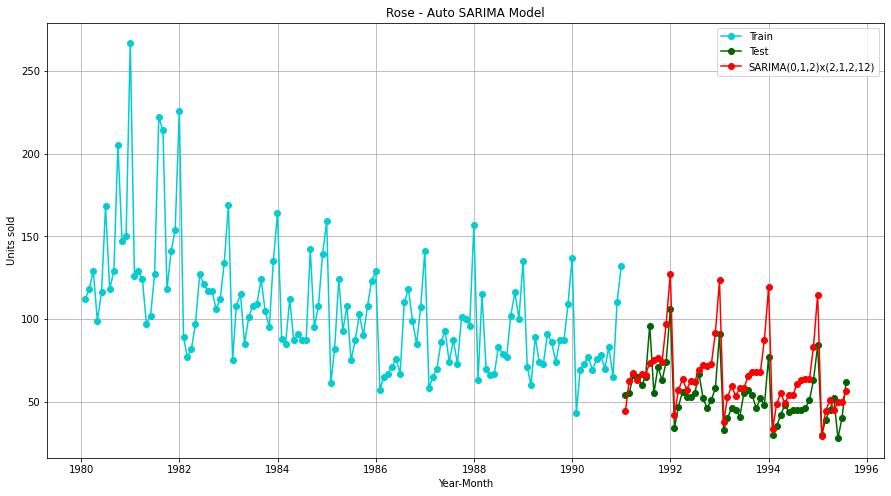

In [98]:
plt.figure(figsize=(15, 8))
plt.grid()
plt.plot(SARIMA_train['Rose'], label='Train', color = 'darkturquoise',marker="o")
plt.plot(SARIMA_test['Rose'], label='Test', color = 'darkgreen',marker="o")
plt.plot(SARIMA_test['rose_forecasted'], color='red', label='SARIMA(0,1,2)x(2,1,2,12)',marker="o")
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA Model')
plt.legend(loc='best');

In [99]:
rmse_SARIMA_auto_model = metrics.mean_squared_error(SARIMA_test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
results_auto_SARIMA = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model]}
                           ,index=['Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)'])
results_auto_SARIMA

,Test RMSE
"Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)",16.519183


7.	Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Auto SARIMA on log series

In [100]:
rose_log_train = np.log10(SARIMA_train['Rose'])

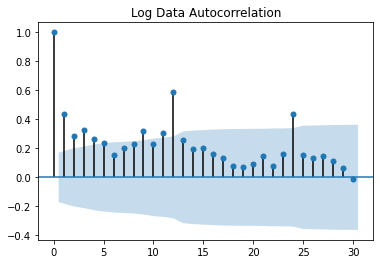

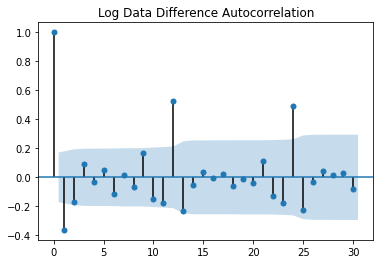

In [101]:
plot_acf(rose_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(rose_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

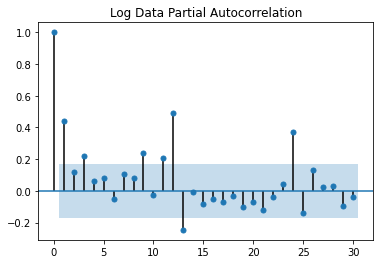

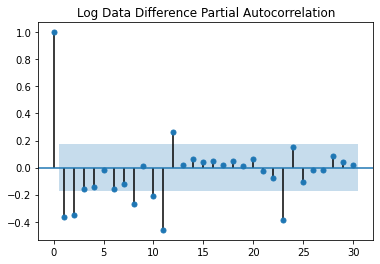

In [102]:
plot_pacf(rose_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(rose_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

In [103]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [104]:
SARIMA_AIC_rose_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose_log

,param,seasonal,AIC


In [105]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose_log = SARIMA_model_rose_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose_log.aic))
        SARIMA_AIC_rose_log = SARIMA_AIC_rose_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose_log.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-132.28115088413216
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-151.24402059017405


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-163.20900777080146
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-151.3974159692613


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-195.69810195440235


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-168.6306138921585
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-176.14679358430362


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-193.8094316255666


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-182.39902099842257
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-184.19318105265185


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-184.99828078851547


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-167.6981220797342
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-189.56133413984367


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-189.05004928888627


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-188.67550209751099
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-163.31782090575595


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-163.44104698594498


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-165.20264554908704
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:-180.16317688318517


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:-193.9888499572035


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.8803832512148
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:-201.16086931188127


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:-245.31562331028007


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:-215.71778281738656
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:-226.46068029892245


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:-247.07640831971352


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.17137564281515


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:-227.9685422095447


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.91037308267093


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:-214.00427260253045


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:-238.87035274857783


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:-236.8730040091988


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:-233.2782407048991


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:-211.7084808171345


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:-213.56045330353257


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:-213.98364981339407
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:-180.90674392527401


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:-195.15144478565955


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:-204.86494780151548
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:-201.89225847042363


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:-242.2321258369187


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:-211.40879803993374
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:-229.57397102519036

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)



SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:-243.8188444455352


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:-227.07067227742917


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:-229.60606916647887


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:-226.58393795928328
SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:-209.77478880947223


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:-239.81418566652923


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:-237.8779625493481


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:-235.53511760975275


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:-210.5434087565207


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:-211.9355626034804


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:-209.98191976957003
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:-148.6665755637958
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:-165.5739247486646


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:-177.05292858623983
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:-161.81472986999688


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:-210.40657530171123
SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:-185.95216957366094
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:-184.88200542700835


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:-207.51664220299878


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:-195.9745311543791
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:-195.1918237424858


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:-197.24859985438422


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:-184.69351553094793


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.83483584715412


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:-200.27919617828255


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:-202.8368654696588


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:-181.3007950170379


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:-181.4530888746527


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:-183.62490814218296
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:-181.82485136782827


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:-195.90180087120405


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:-206.14977947911933
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.191204828583


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:-244.19409786351557


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:-214.22123225786274


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:-225.89780085430846


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.52380380412797


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:-226.36034052518534


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:-227.10895291723898


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:-225.59590640097255


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:-212.509907331958


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:-236.6315141745689


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:-235.03476124224892


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:-233.13837801234334


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:-211.03141443145722


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:-212.88612573321402


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:-212.25038668148028
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:-180.26441475486428


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:-193.1517844415631


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:-202.3634178878092


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:-200.35112546370786


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:-243.15204086449535
SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:-209.4093522154524


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:-225.49521382609967


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:-245.7924455704353


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:-225.46377321337377


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:-225.47007570077506


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:-224.62296699114023


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:-207.7191287085002


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:-235.62223908833138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:-233.63929922574906


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:-233.33372198700175


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:-209.0603732345593


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:-211.3595640502076


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:-208.3005719355613
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:-162.05049979882878


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:-172.67759303560985


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:-183.51513417794828
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:-170.97394379975688


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:-216.0165087578948


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:-190.22657775440848
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:-192.70643225392388


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:-218.07090972320992


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:-201.8372453932085


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:-198.56160811349824


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:-200.1557968831057


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:-188.8421659902164


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:-206.07555868702414


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:-204.24887965281562


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:-205.94342554876926


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:-184.84843533054504
SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:-186.32669994262042


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:-187.5162153461068
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:-180.1864223693237


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:-194.72043238532873


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.38611381135468
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.99973839574042


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-243.36373725789818


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-212.24002385396108


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-224.05002215801625


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.47194086317342


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.25690058060206


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-222.9697347423811


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.91674540856565
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-211.06435092965486


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-235.52218606716508


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-233.66212441832494


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-234.3304852712299


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-207.1047010073134


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-209.45566532168348


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.3589180364389
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-178.28757664053109


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-190.7797964099225


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-200.81603182142263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-199.75650454598514


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-243.70798246473487


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-208.4775017942258


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-222.20025788954476


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-243.81898740281554


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-224.1178729844261


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-222.28385950552658


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-225.61319561907263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-205.69457887556032


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-231.56915912635765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-229.9386288678168


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-231.6073760420368


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-205.08744963933904


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.22657644359847


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-206.31360096434608


In [106]:
SARIMA_AIC_rose_log.sort_values(by=['AIC']).head()

,param,seasonal,AIC
25,"(0, 1, 1)","(1, 0, 1, 12)",-247.076408
79,"(1, 1, 1)","(1, 0, 1, 12)",-246.523804
133,"(2, 1, 1)","(1, 0, 1, 12)",-246.471941
97,"(1, 1, 2)","(1, 0, 1, 12)",-245.792446
22,"(0, 1, 1)","(0, 1, 1, 12)",-245.315623


In [107]:
#(0, 1, 1)*(1, 0, 1, 12) AIC=-247.076408
import statsmodels.api as sm

auto_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose_log = auto_SARIMA_rose_log.fit(maxiter=1000)
print(results_auto_SARIMA_rose_log.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 127.538
Date:                            Thu, 03 Mar 2022   AIC                           -247.076
Time:                                    04:26:06   BIC                           -236.028
Sample:                                01-31-1980   HQIC                          -242.591
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0652      0.058    -18.391      0.000      -1.179      -0.952
ar.S.L12       0.9554      0.028   

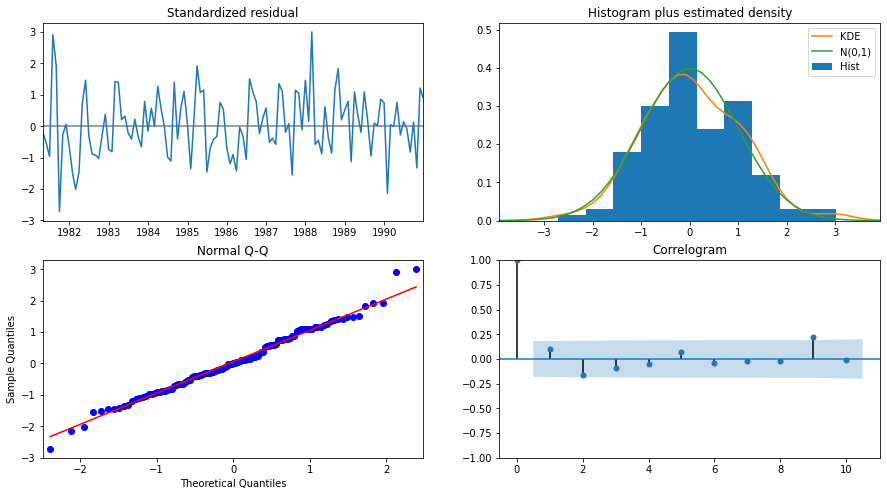

In [108]:
results_auto_SARIMA_rose_log.plot_diagnostics(figsize=(15,8))
plt.show()

In [109]:
predicted_auto_SARIMA_rose_log = results_auto_SARIMA_rose_log.get_forecast(steps=len(SARIMA_test['Rose']))

In [110]:
predicted_auto_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,1.754735,0.076365,1.605062,1.904407
1991-02-28,1.821765,0.076457,1.671912,1.971619
1991-03-31,1.848386,0.076600,1.698253,1.998519
1991-04-30,1.821995,0.076742,1.671584,1.972406
1991-05-31,1.839049,0.076884,1.688360,1.989738


In [111]:
# Extract the predicted and true values of our time series
rose_forecasted_log = predicted_auto_SARIMA_rose_log.predicted_mean
SARIMA_test['rose_forecasted_log'] = np.power(10, predicted_auto_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

,Rose,rose_forecasted,rose_forecasted_log
Time_Stamp,,,
1991-01-31,54.0,44.213781,56.850533
1991-02-28,55.0,62.326882,66.338434
1991-03-31,66.0,67.313430,70.531935
1991-04-30,65.0,63.161181,66.373566
1991-05-31,60.0,66.474203,69.031790


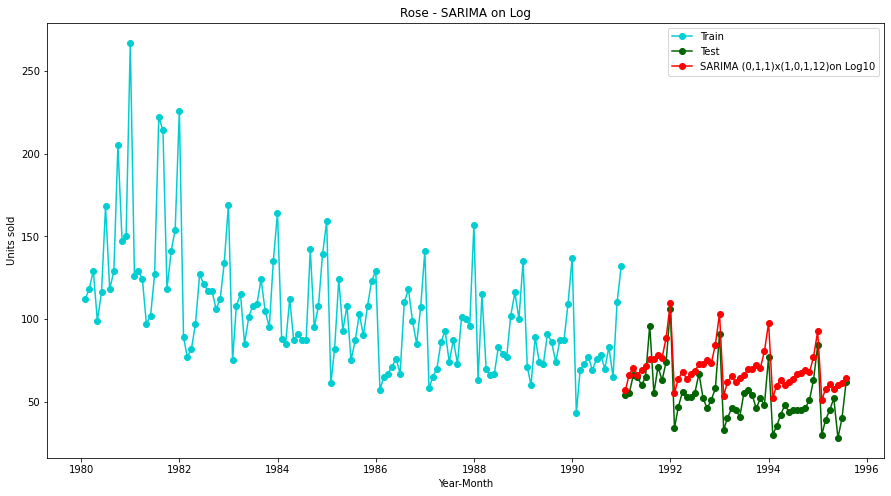

In [112]:
plt.figure(figsize=(15,8))
plt.plot(SARIMA_train['Rose'], label='Train', color = 'darkturquoise',marker="o")
plt.plot(SARIMA_test['Rose'], label='Test', color = 'darkgreen',marker="o")

plt.plot(SARIMA_test['rose_forecasted_log'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10',marker="o")
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Rose - SARIMA on Log')
plt.legend(loc='best');

In [113]:
rmse_SARIMA_auto_model_log = metrics.mean_squared_error(SARIMA_test['Rose'],SARIMA_test['rose_forecasted_log'],squared=False)

results_SARIMA_auto_model_log = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model_log]}
                           ,index=['Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)'])

results_SARIMA_auto_model_log

,Test RMSE
"Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)",17.912887


Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Manual ARIMA

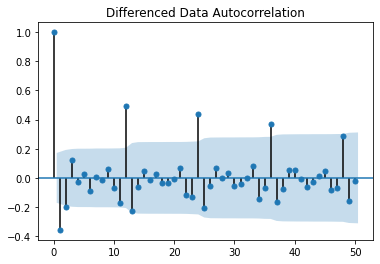

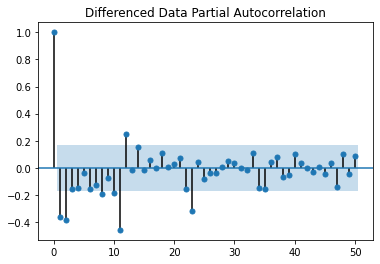

In [114]:
plot_acf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [115]:
manual_ARIMA = ARIMA(train_rose['Rose'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.576
Method:                           css   S.D. of innovations             38.931
Date:                Thu, 03 Mar 2022   AIC                           1335.153
Time:                        04:26:07   BIC                           1340.903
Sample:                    02-29-1980   HQIC                          1337.489
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1527      3.401      0.045      0.964      -6.514       6.819


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [116]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_rose['Rose']))
rmse_arima_manual_model = metrics.mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA[0],squared=False)

results_arima_manual = pd.DataFrame({'Test RMSE': [rmse_arima_manual_model]}
                           ,index=['Manual_ARIMA(0,1,0)'])
results_arima_manual

,Test RMSE
"Manual_ARIMA(0,1,0)",84.153191


Manual SARIMA

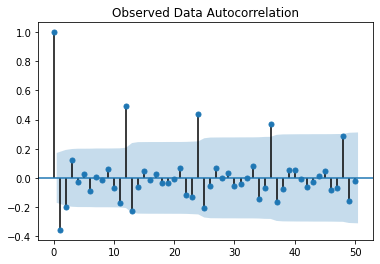

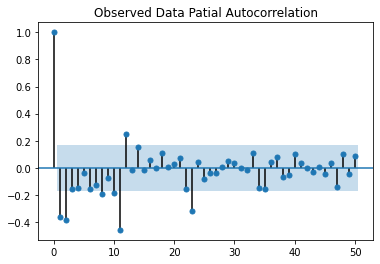

In [117]:
plot_acf(SARIMA_train['Rose'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(SARIMA_train['Rose'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

In [118]:
#(4, 1, 2)*(0, 1, 2, 12)
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Thu, 03 Mar 2022   AIC                            786.737
Time:                                    04:26:11   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

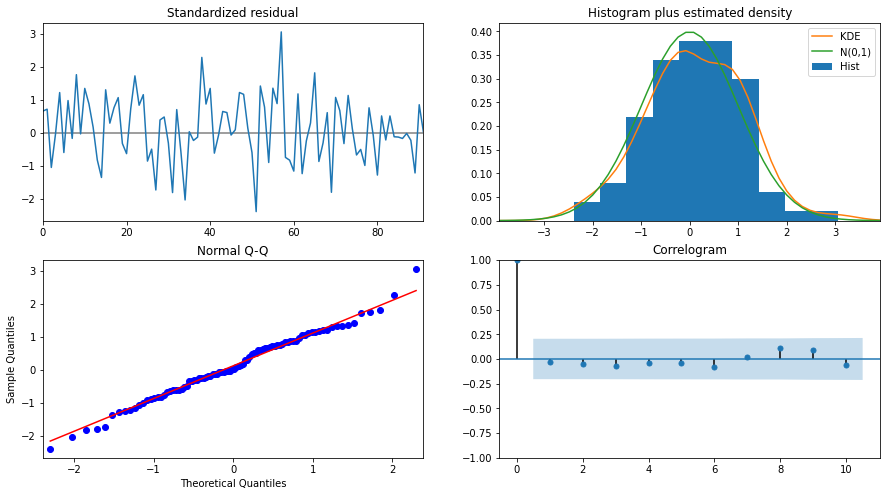

In [119]:
results_manual_SARIMA_rose.plot_diagnostics(figsize=(15,8))
plt.show()

In [120]:
predicted_manual_SARIMA = results_manual_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']))
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()


y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.733041,15.552667,14.250374,75.215707
1,64.208694,16.000768,32.847765,95.569622
2,65.110690,16.074607,33.605040,96.616340
3,68.453063,16.150996,36.797692,100.108434
4,61.423433,16.154556,29.761085,93.085782


In [121]:
# Extract the predicted and true values of our time series
manual_rose_forecasted = predicted_manual_SARIMA.predicted_mean
SARIMA_test['manual_rose_forecasted'] = predicted_manual_SARIMA.predicted_mean
SARIMA_test.head()

,Rose,rose_forecasted,rose_forecasted_log,manual_rose_forecasted
Time_Stamp,,,,
1991-01-31,54.0,44.213781,56.850533,44.733041
1991-02-28,55.0,62.326882,66.338434,64.208694
1991-03-31,66.0,67.313430,70.531935,65.110690
1991-04-30,65.0,63.161181,66.373566,68.453063
1991-05-31,60.0,66.474203,69.031790,61.423433


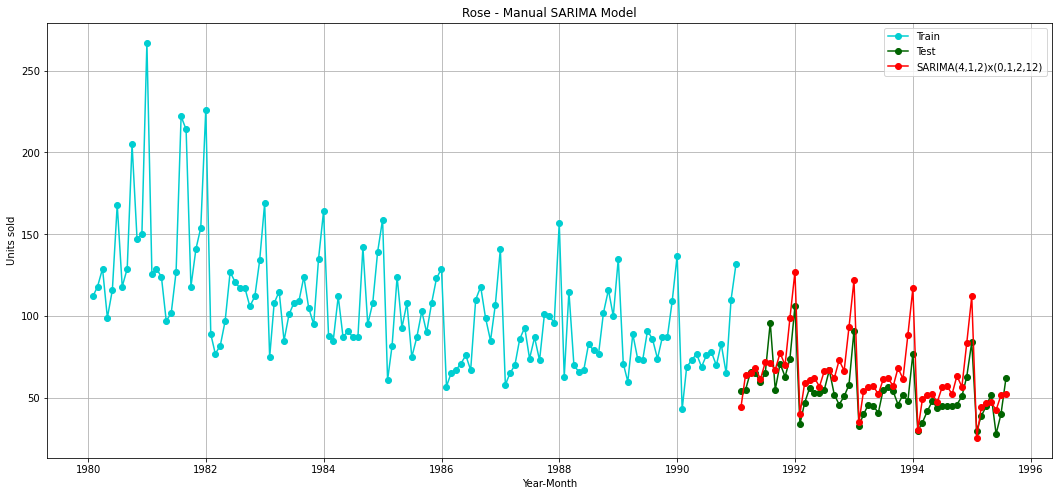

In [122]:
plt.figure(figsize=(18,8))
plt.plot(SARIMA_train['Rose'], label='Train', color = 'darkturquoise',marker="o")
plt.plot(SARIMA_test['Rose'], label='Test', color = 'darkgreen',marker="o")

plt.plot(SARIMA_test['manual_rose_forecasted'], color='red', label='SARIMA(4,1,2)x(0,1,2,12)',marker="o")
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.grid()
plt.title('Rose - Manual SARIMA Model')
plt.legend(loc='best');

In [123]:
rmse_SARIMA_manual_model = metrics.mean_squared_error(SARIMA_test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
results_SARIMA_manual = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual_model]}
                           ,index=['Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)'])
results_SARIMA_manual


,Test RMSE
"Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)",15.387491


In [124]:
results_of_ARIMA_SARIMA=pd.concat([results_auto_ARIMA, results_auto_SARIMA, results_SARIMA_auto_model_log, results_arima_manual,results_SARIMA_manual])
results_of_ARIMA_SARIMA

,Test RMSE
"Auto_ARIMA(0, 1, 2)",15.625163
"Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)",16.519183
"Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)",17.912887
"Manual_ARIMA(0,1,0)",84.153191
"Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)",15.387491


8.	Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [125]:
all_models_RMSE_values=pd.concat([RMSE_values,results_of_ARIMA_SARIMA])
all_models_RMSE_values

,Test RMSE
For 2 point Moving Average,11.529409
For 4 point Moving Average,14.455221
For 6 point Moving Average,14.572009
For 9 point Moving Average,14.731209
Linear Regression,15.275732
SimpleAverage,53.480857
Naive Model,79.738550
"Alpha=0.995,Simple Exponential Smoothing",36.816908
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.591922
"Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing",17.395241


In [126]:
all_models_RMSE_values=pd.concat([RMSE_values,results_of_ARIMA_SARIMA]).sort_values(by=['Test RMSE'])
all_models_RMSE_values

,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",10.951007
For 2 point Moving Average,11.529409
For 4 point Moving Average,14.455221
For 6 point Moving Average,14.572009
For 9 point Moving Average,14.731209
Linear Regression,15.275732
"Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)",15.387491
"Auto_ARIMA(0, 1, 2)",15.625163
"Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)",16.519183
"Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing",17.395241


# Selecting the models for future forecasting- TES(alpha=0.3,beta=0.3,gamma=0.3]


9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

In [127]:
Full_model_TES_rose = ExponentialSmoothing(df_rose['Rose'],trend='additive',seasonal='multiplicative')
Full_model_TES_rose_fit = Full_model_TES_rose.fit(smoothing_level=0.3,smoothing_slope=0.3,smoothing_seasonal=0.3,optimized=True,use_brute=True)
TES_rose_forecast = Full_model_TES_rose_fit.forecast(steps=12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [128]:
rmse_rose_tes_full = metrics.mean_squared_error(df_rose['Rose'],Full_model_TES_rose_fit.fittedvalues,squared=False)
results_tes_full= pd.DataFrame({'Test RMSE': [rmse_rose_tes_full]}
                           ,index=['TES(alpha=0.3,beta=0.3,gamma=0.3]'])
results_tes_full

,Test RMSE
"TES(alpha=0.3,beta=0.3,gamma=0.3]",19.959742


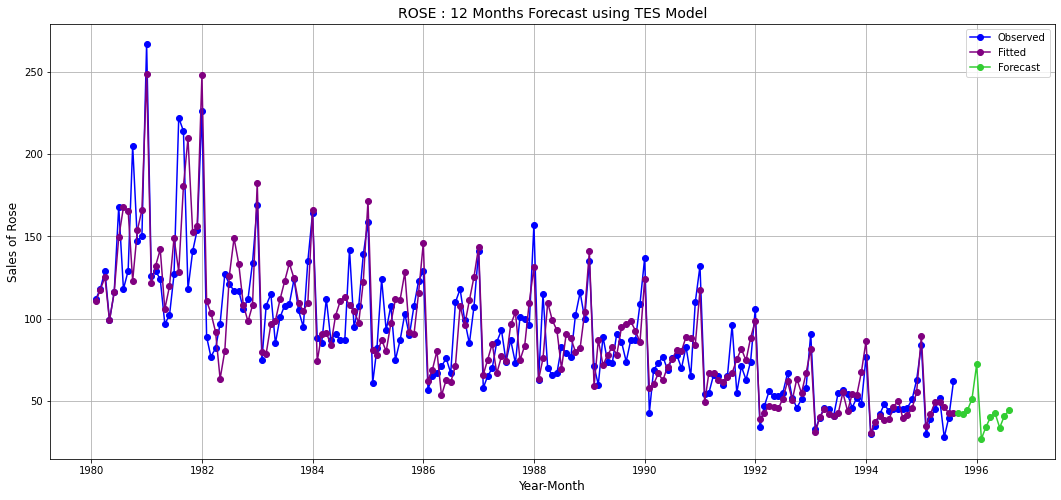

In [129]:
plt.figure(figsize=(18,8))

plt.plot(df_rose['Rose'], label='Observed', color = 'blue',marker="o")
plt.plot(Full_model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple',marker="o")
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen',marker="o")

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)
plt.grid()
plt.legend(loc='best')
plt.show()

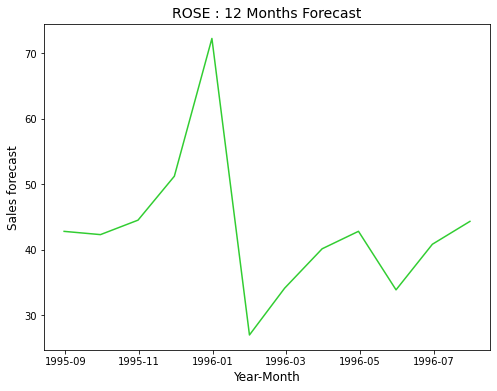

In [130]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14);

In [131]:
TES_rose_forecast

1995-08-31    42.778907
1995-09-30    42.282292
1995-10-31    44.492235
1995-11-30    51.203768
1995-12-31    72.248685
1996-01-31    26.949939
1996-02-29    34.092001
1996-03-31    40.118853
1996-04-30    42.787207
1996-05-31    33.844690
1996-06-30    40.811106
1996-07-31    44.304542
Freq: M, dtype: float64

In [132]:
TES_rose_forecast.describe()

count    12.000000
mean     42.992852
std      11.124067
min      26.949939
25%      38.612140
50%      42.530600
75%      44.351465
max      72.248685
dtype: float64

In [133]:
df_rose.describe()

,Rose
count,187.000000
mean,89.909091
std,39.244440
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000
